In [52]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [53]:
df = pd.read_csv("nba2k-full.csv")
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [54]:
df = df[~df["draft_round"].isin(['Undrafted'])] #remove undrafted players
df = df[~df["draft_peak"].isin(['Undrafted'])]

In [55]:
df['salary'] = df['salary'].map(lambda x: x.lstrip('$'))
df['salary'] = df['salary'].astype(int)

In [56]:
df = df[["rating", "team", "position", "b_day", "country", "salary"]] #selected colums to train

In [57]:
df = df.dropna()
df.isnull().sum()

rating      0
team        0
position    0
b_day       0
country     0
salary      0
dtype: int64

In [58]:
df["b_day"] = pd.to_datetime(df["b_day"])


In [59]:
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 

In [60]:
df['b_day'] = df['b_day'].apply(calculateAge)


In [61]:
df = df.rename({"b_day": "age"}, axis=1)

In [62]:
df.head()

,rating,team,position,age,country,salary
0,97,Los Angeles Lakers,F,37,USA,37436858
1,97,Los Angeles Clippers,F,30,USA,32742000
2,96,Milwaukee Bucks,F-G,27,Greece,25842697
3,96,Brooklyn Nets,F,33,USA,37199000
4,96,Houston Rockets,G,32,USA,38199000


In [63]:
df['team'].unique()

array(['Los Angeles Lakers', 'Los Angeles Clippers', 'Milwaukee Bucks',
       'Brooklyn Nets', 'Houston Rockets', 'Golden State Warriors',
       'Portland Trail Blazers', 'Philadelphia 76ers', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Miami Heat', 'Utah Jazz',
       'Detroit Pistons', 'Boston Celtics', 'Dallas Mavericks',
       'San Antonio Spurs', 'Washington Wizards', 'Indiana Pacers',
       'Toronto Raptors', 'Sacramento Kings', 'Phoenix Suns',
       'Cleveland Cavaliers', 'New Orleans Pelicans', 'Orlando Magic',
       'Atlanta Hawks', 'Chicago Bulls', 'Oklahoma City Thunder',
       'New York Knicks', 'Memphis Grizzlies', 'Charlotte Hornets'],
      dtype=object)

In [64]:
df['country'].value_counts()

USA                                 264
Canada                               13
France                                7
Croatia                               6
Spain                                 5
Australia                             5
Serbia                                4
Turkey                                4
Cameroon                              3
Slovenia                              3
Latvia                                3
Nigeria                               3
Germany                               3
Greece                                3
Democratic Republic of the Congo      2
Ukraine                               2
Lithuania                             2
Bosnia and Herzegovina                2
Italy                                 2
The Bahamas                           2
Mali                                  1
Haiti                                 1
Angola                                1
Georgia                               1
Brazil                                1


In [65]:
def removeOtherCountries(country):
    if country not in ['USA']:
        return 'Other countries'
    else:
        return country

df['country'] = df['country'].apply(removeOtherCountries)
df['country'].value_counts()
   

USA                264
Other countries     92
Name: country, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 438
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rating    356 non-null    int64 
 1   team      356 non-null    object
 2   position  356 non-null    object
 3   age       356 non-null    int64 
 4   country   356 non-null    object
 5   salary    356 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 19.5+ KB


In [67]:
#label encoder to map objs to array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['team'] = le.fit_transform(df['team'])
df['position'] = le.fit_transform(df['position'])
df['country']  = le.fit_transform(df['country'])

df.head()

,rating,team,position,age,country,salary
0,97,13,2,37,1,37436858
1,97,12,2,30,1,32742000
2,96,16,4,27,0,25842697
3,96,2,2,33,1,37199000
4,96,10,5,32,1,38199000


In [68]:
x = df.drop(['salary'], axis = 1) #drops salary from x-axis
y = df['salary']

In [69]:
df['salary'].value_counts()

1416852     16
898310       9
1618520      8
4767000      6
32742000     5
            ..
12667885     1
6500000      1
19894737     1
15500000     1
31579390     1
Name: salary, Length: 275, dtype: int64

In [70]:
df['age'].value_counts()

25    34
24    34
27    31
23    30
26    29
28    25
30    25
29    23
31    22
33    21
22    21
21    13
32    13
35    12
36    10
34     7
37     4
40     1
39     1
Name: age, dtype: int64

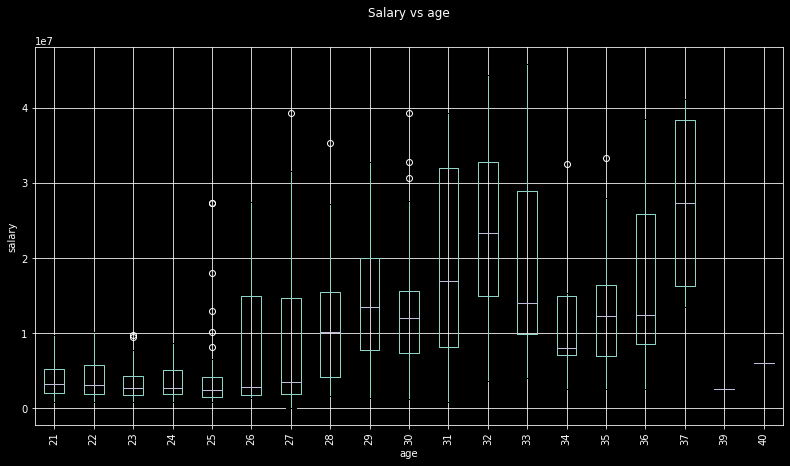

In [71]:
fig, ax = plt.subplots(1,1, figsize=(13, 7))
df.boxplot('salary', 'age', ax=ax)
plt.suptitle('Salary vs age')
plt.title('')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, predictions))

In [75]:
print("${:,.02f}".format(error))


$6,151,439.95


In [76]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x_train, y_train)
predictions = random_forest_reg.predict(x_test)

In [77]:
error = np.sqrt(mean_squared_error(y_test, predictions))
print("${:,.02f}".format(error))

$5,887,965.74


In [78]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [79]:
regressor = gs.best_estimator_
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, predictions))
print("${:,.02f}".format(error))

$5,723,605.17


In [80]:
x #see values of x

,rating,team,position,age,country
0,97,13,2,37,1
1,97,12,2,30,1
2,96,16,4,27,0
3,96,2,2,33,1
4,96,10,5,32,1
...,...,...,...,...,...
434,95,2,2,33,1
435,95,13,3,28,1
436,94,6,6,22,0
437,94,24,5,31,1


In [81]:
# example input to calculate prediction using training model
            #rating, team, position, age, country
X = np.array([[90, 12, 2, 30, 1]])
X

array([[90, 12,  2, 30,  1]])

In [82]:
#regression test for example input array
reg = regressor.predict(X)
reg

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([31858743.32170058])

In [83]:
import pickle

In [84]:
data = {"model": regressor}
with open('saved_file.pkl', 'wb') as file:
    pickle.dump(data, file)

In [85]:
with open('saved_file.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]